<a href="https://colab.research.google.com/github/BarelHeby/Deep-Learning---Chest-X-Ray/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Testing Notebook**

---



In [231]:
# @title Initial Setups
# Imports
import keras
import shutil
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error

# Constants Definitions
CLASS_NAMES_MODEL_1=["NORMAL","PNEUMONIA"]
CLASS_NAMES_MODEL_2=['BACTERIA', 'NORMAL', 'VIRUS']
THRESHOLD_ASSIGMENT_3 = 0.007
# Models Setup
try:
  shutil.rmtree("/content/deep_learning_xray")
except:
  pass
!gdown -q --folder https://drive.google.com/drive/u/0/folders/1b1w5RIpdrlQw6f48n1ALvREPfmP-B96p
model_assigment_1 = keras.models.load_model("/content/deep_learning_xray/Models/model_assigment_1.keras")
model_assigment_2 = keras.models.load_model("/content/deep_learning_xray/Models/model_assigment_2.keras")
model_assigment_3 = keras.models.load_model("/content/deep_learning_xray/Models/model_assigment_3.keras")

---
# **Classifier Class**
---


This class is like a tool for sorting your data into different groups. To start using it, you need to set it up with two things:


*   the model (which is like the brain of the tool)
*   the task number (which tells the tool what job you want it to do)


Once it’s set up, you can use the class function to start  classifying your objects.

In [250]:
class Classifier:
  def __init__(self,model:keras.Model,assigment_number) -> None:
    self.model = model
    self.assigment_number = assigment_number

  def __path_to_image(self,image_path):
    img = cv2.imread(image_path,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(256,256))
    if self.assigment_number==3:
      img = img.astype(np.float32)
      img/=255.0
    return img

  def __classify(self,images:np.array):
    predictions=[]
    prediction = self.model.predict(images,verbose=0)
    if self.assigment_number==1:
      for p in prediction:
        predictions.append( CLASS_NAMES_MODEL_1[0] if p <0.5 else CLASS_NAMES_MODEL_1[1])

    if self.assigment_number==2:
      for p in prediction:
        idx = np.argmax(p)
        predictions.append(CLASS_NAMES_MODEL_2[idx])

    if self.assigment_number==3:
      for pred,origin in zip(prediction,images):
        mse= self.__get_mse_values(origin,pred)
        predictions.append( "NORMAL" if mse < THRESHOLD_ASSIGMENT_3 else "PNEUMONIA")

    return predictions

  def classify_by_image_path(self,image_path):
    img = self.__path_to_image(image_path)
    return self.__classify(np.array([img]))[0]

  def classify_folder(self,folder_path):
    images_paths = [os.path.join(folder_path,img_name) for img_name in os.listdir(folder_path) if img_name.endswith(("jpeg","jpg")) ]
    images_to_classify = [self.__path_to_image(img_path) for img_path in images_paths]
    return self.__classify(np.array(images_to_classify))

  def __get_mse_values(self,img_data,prediction):
    img_data = img_data.reshape(img_data.shape[0], -1)
    prediction = prediction.reshape(prediction.shape[0], -1)
    return mean_squared_error(img_data, prediction)

In [247]:
NORMAL_folder = "/content/deep_learning_xray/Data/NORMAL"
PNEUMONIA_folder = "/content/deep_learning_xray/Data/PNEUMONIA"
model_1_classifier = Classifier(model_assigment_1,1)
print(model_1_classifier.classify_folder(PNEUMONIA_folder))
model_1_classifier.classify_by_image_path("/content/deep_learning_xray/Data/NORMAL/IM-0129-0001.jpeg")

['/content/deep_learning_xray/Data/PNEUMONIA/person1004_bacteria_2935.jpeg', '/content/deep_learning_xray/Data/PNEUMONIA/person1000_virus_1681.jpeg', '/content/deep_learning_xray/Data/PNEUMONIA/person1001_bacteria_2932.jpeg']
['PNEUMONIA', 'PNEUMONIA', 'NORMAL']


'NORMAL'

In [252]:
BACKTERIA_image_path = "/content/deep_learning_xray/Data/PNEUMONIA/person1001_bacteria_2932.jpeg"
VIRUS_image_path = "/content/deep_learning_xray/Data/PNEUMONIA/person1000_virus_1681.jpeg"
NORMAL_image_path = "/content/deep_learning_xray/Data/NORMAL/IM-0141-0001.jpeg"

model_2_classifier = Classifier(model_assigment_2,2)
print(model_2_classifier.classify_by_image_path(BACKTERIA_image_path))
print(model_2_classifier.classify_by_image_path(VIRUS_image_path))
print(model_2_classifier.classify_by_image_path(NORMAL_image_path))

BACTERIA
VIRUS
NORMAL


In [258]:
model_3_classifier = Classifier(model_assigment_3,3)
print(model_3_classifier.classify_by_image_path("/content/deep_learning_xray/Data/NORMAL/IM-0129-0001.jpeg"))
print(model_3_classifier.classify_by_image_path("/content/deep_learning_xray/Data/PNEUMONIA/person1018_virus_1706.jpeg"))
print(model_3_classifier.classify_folder(NORMAL_folder))
print(model_3_classifier.classify_folder(PNEUMONIA_folder))

NORMAL
PNEUMONIA
['NORMAL', 'NORMAL']
['PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA']


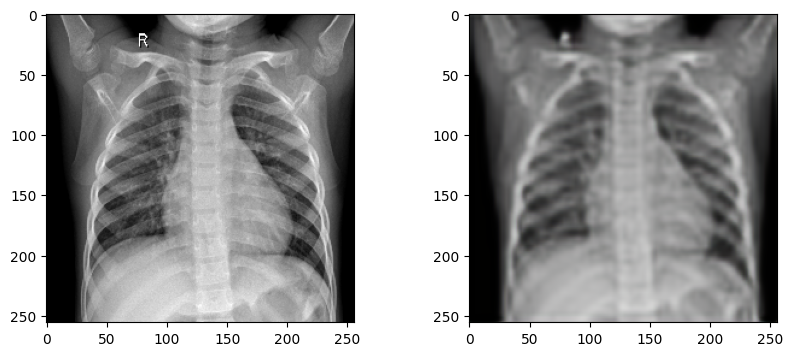

In [205]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(origin_image)
plt.subplot(1, 2, 2)
plt.imshow(decoded_data[0])
plt.show()